# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [3]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')
df.Month =pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
# .set_index('Month')

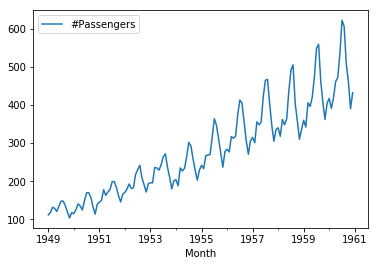

In [4]:
df.plot()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [20]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(ts):
    rolmean = ts.rolling(window = 8, center = False).mean()
    rolstd = ts.rolling(window = 8, center = False).std()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:\n')
    dftest = adfuller(ts['#Passengers'])

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    plt.figure(figsize=(16,5))
    plt.plot(ts, label='Passengers')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Standard Dev.')
    plt.title('Airline Passengers')
    plt.legend(loc='best')
    plt.xlabel('Time (months)')
    plt.ylabel('Passengers')
    plt.show()
    


Use your newly created function on the airpassenger data set.

Results of Dickey-Fuller Test:

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


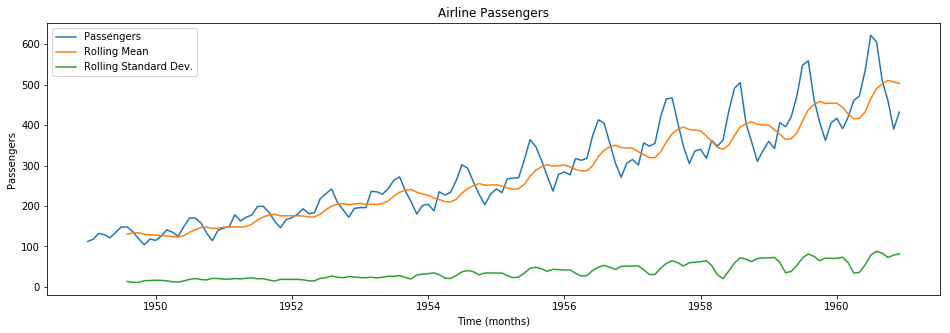

In [21]:
stationarity_check(df)

## Perform a log() and sqrt() transform

In [22]:
len(np.log(df['#Passengers']))

144

Results of Dickey-Fuller Test:

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


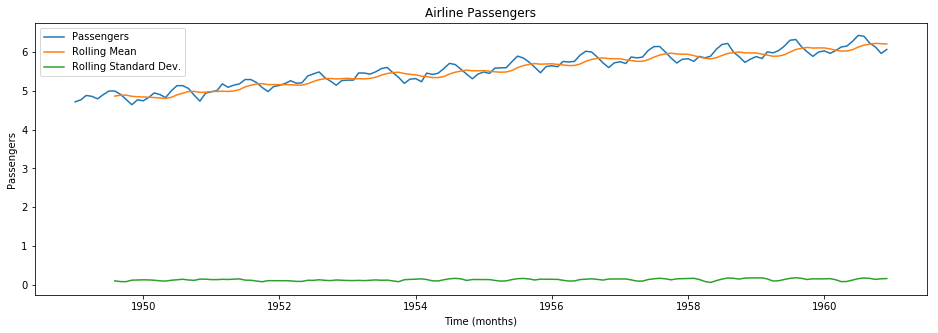

Results of Dickey-Fuller Test:

Test Statistic                  -0.345854
p-value                          0.918754
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


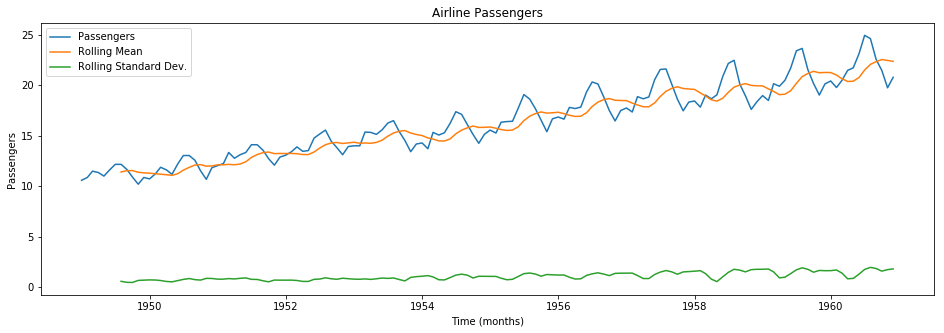

In [23]:
# Log transform timeseries and compare with original to check the effect
data = np.log(df)
data2 = np.sqrt(df)

stationarity_check(data)
stationarity_check(data2)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [31]:
rolmean = np.log(df).rolling(window = 7).mean()

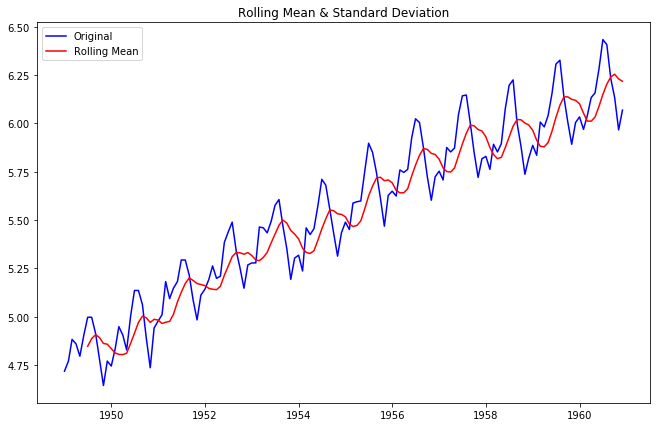

In [32]:
rolmean = np.log(df).rolling(window = 7).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(np.log(df), color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [33]:
# Subtract the moving average from the original data and check head for Nans

data_minus_rolmean = np.log(df) - rolmean
data_minus_rolmean.head(10)


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [34]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

Results of Dickey-Fuller Test:

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


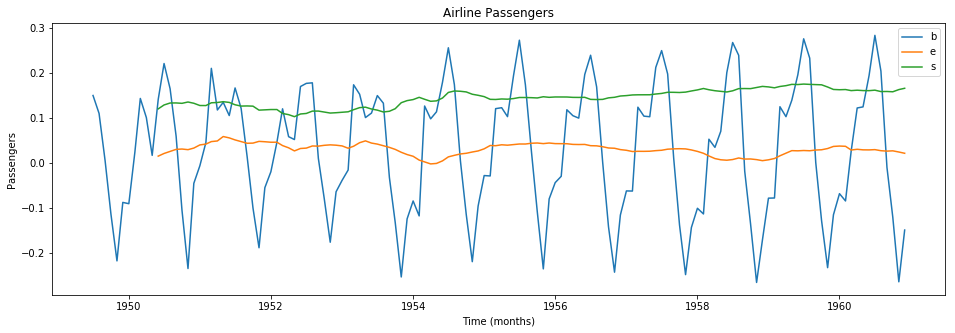

In [35]:
# Plot the result
stationarity_check(data_minus_rolmean)

Finally, use your function `check_stationarity` to see if this series is considered stationary!

In [9]:
# Your code here

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

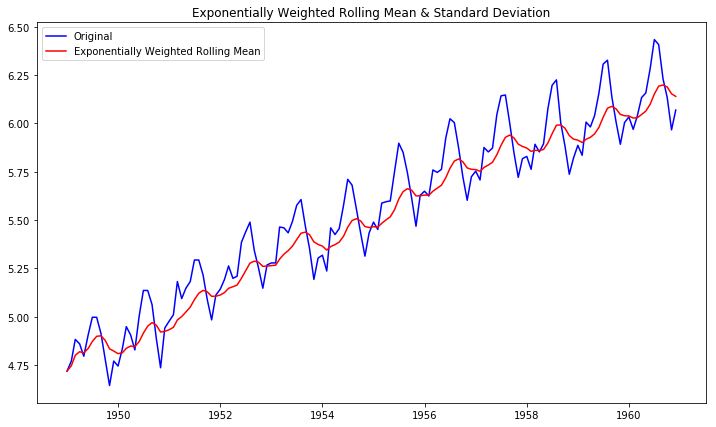

In [23]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = np.log(df).ewm(halflife = 4).mean()
# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(np.log(df), color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [25]:
# Subtract the moving average from the original data and plot
data_minus_exp_rolmean = np.log(df) - exp_rolmean
data_minus_exp_rolmean.head()


,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.023838
1949-03-01,0.082598
1949-04-01,0.040640
1949-05-01,-0.016963


Results of Dickey-Fuller Test:

Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


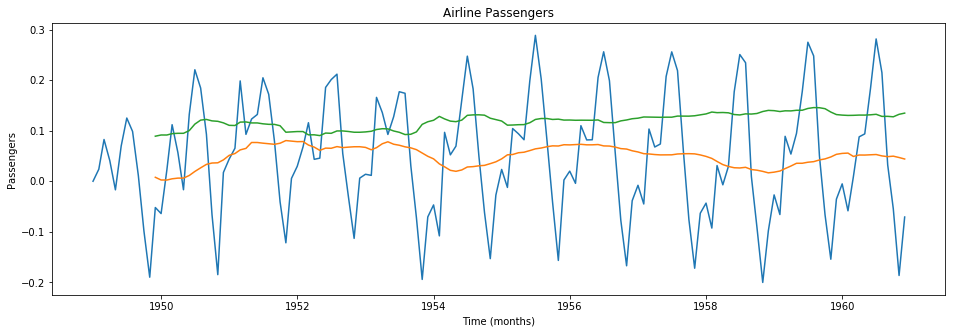

In [26]:
# do a stationarity check

stationarity_check(data_minus_exp_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [37]:
data_diff = data_minus_exp_rolmean.diff(periods=12)
data_diff.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


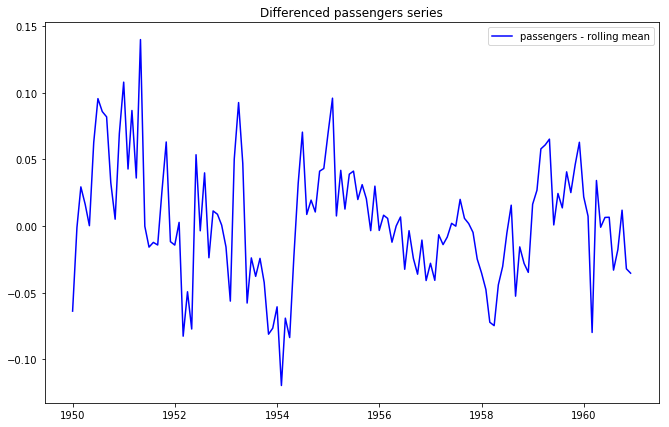

In [38]:
# plot your differenced time series
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='passengers - rolling mean')
plt.legend(loc='best')
plt.title('Differenced passengers series')
plt.show(block=False)

In [39]:
# drop nas
data_diff.dropna(inplace=True)

In [16]:
# perform the stationarity check
stationarity_check(data_diff)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.